In [1]:
from random import seed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, average_precision_score,precision_score,f1_score,recall_score

In [3]:
dataset_df = pd.read_csv("total_data.csv")
# 打印文件的行列数
print("shape：", dataset_df.shape)
# 打印文件的分布规律
print(dataset_df.describe())
# 拥有哪些类型的数据
print(dataset_df.info())
#数据没有缺失值

shape： (9948, 15)
            rating         year        price       is_red     is_white  \
count  9948.000000  9948.000000  9948.000000  9948.000000  9948.000000   
mean      2.138219  1996.955569    34.753518     0.332429     0.109369   
std       0.912859   165.718965    39.651556     0.471107     0.312117   
min       0.000000     0.000000     5.000000     0.000000     0.000000   
25%       1.000000  2009.000000    18.000000     0.000000     0.000000   
50%       2.000000  2011.000000    25.000000     0.000000     0.000000   
75%       3.000000  2013.000000    40.000000     1.000000     0.000000   
max       4.000000  2017.000000  1300.000000     1.000000     1.000000   

           is_rose  is_sparkling       is_dry     is_sweet     is_blend  
count  9948.000000   9948.000000  9948.000000  9948.000000  9948.000000  
mean      0.034680      0.006534     0.174708     0.095999     0.214817  
std       0.182978      0.080573     0.379737     0.294605     0.410716  
min       0.000000 

Text(0.5, 1.0, 'price from Different Tasters')

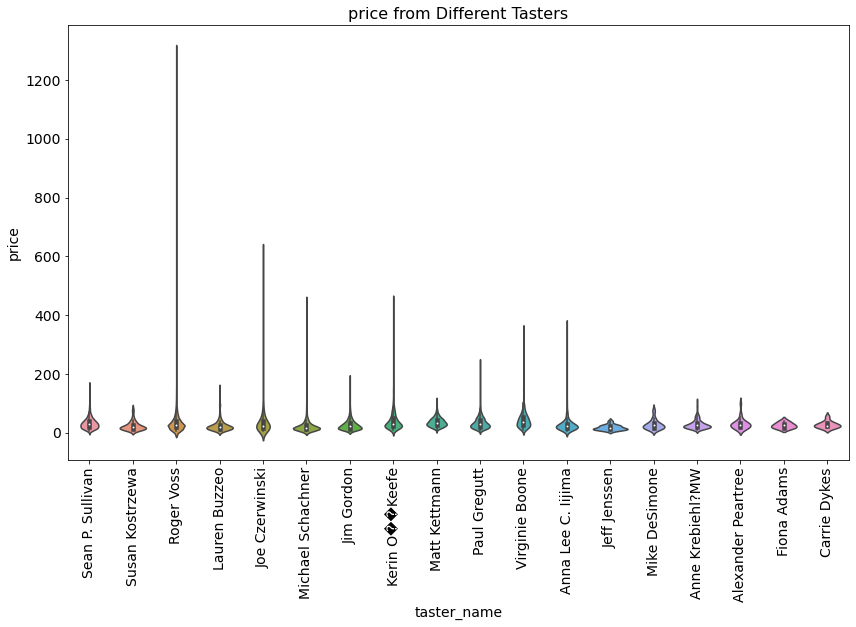

In [4]:
from IPython.core.pylabtools import figsize
# set plot size and font size
figsize(14, 8)
plt.rcParams['font.size'] = 14

# violin plot to see descriptive statistics 
# and distribution
# per taster_name
f = sns.violinplot(data= dataset_df,
                   x="taster_name",
                   y="price")

f.set_xticklabels(f.get_xticklabels(),
                  rotation=90)

plt.title("price from Different Tasters",
          size=16)

<AxesSubplot:title={'center':'Distribution of price per country'}, xlabel='price', ylabel='Density'>

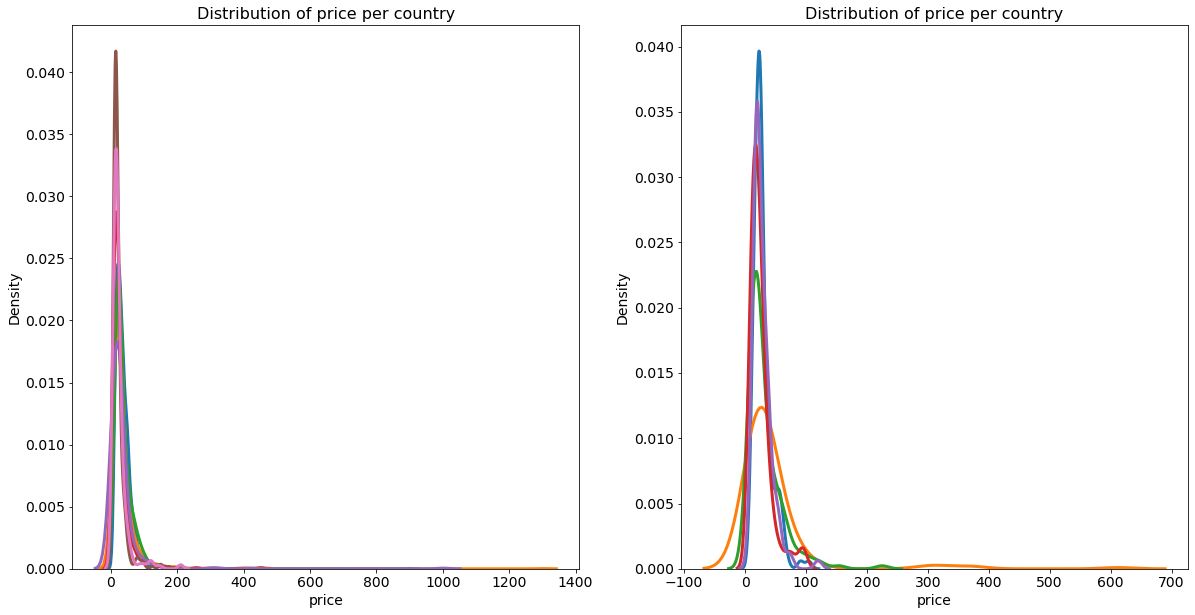

In [5]:
def plot_distribution(df, target, column_values, column_name):
    # funtion to print distribution of a continuous variable
    # for categorical data

    for value in column_values:
        subset = df[
            df[column_name] == value]
        g = sns.kdeplot(subset[target],
                        label = value,
                        linewidth = 3)

    # set title, legends and labels
    plt.ylabel("Density",
               size=14)
    plt.xlabel("{}".format(target),
               size=14)
    plt.title("Distribution of {} per {}"
              .format(target, column_name),
              size=16)

    return g
countries = (dataset_df["country"]
             .value_counts())

freq_countries = list(
    countries[
        countries.values > 300]
    .index)

freq2_countries = list(
    countries[
        (countries.values <= 300) &
        (countries.values >= 100)]
    .index)
# distribution of the price per country
figsize(20, 10)
plt.rcParams['font.size'] = 14


plt.subplot(1, 2, 1)
plot_distribution(dataset_df, "price",
                  freq_countries, "country")

# plot points distribution for second most frequent countries
plt.subplot(1, 2, 2)
plot_distribution(dataset_df, "price",
                  freq2_countries, "country")

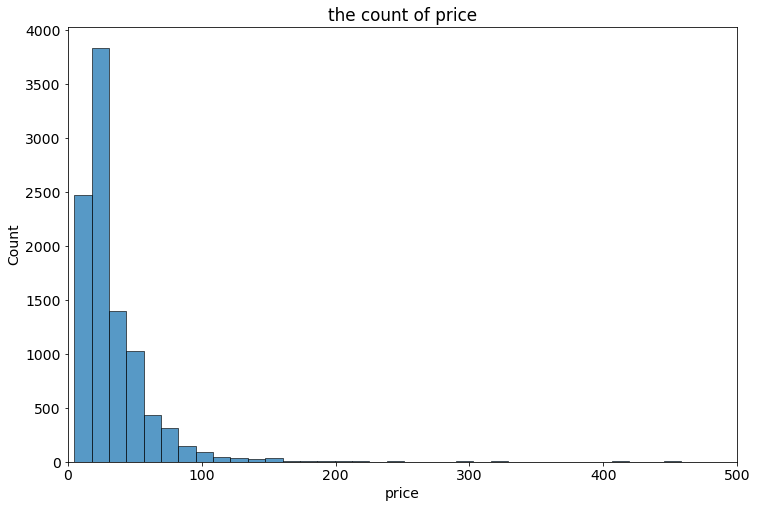

In [6]:
# Some charts to see data relationship 
# price
plt.figure(figsize=(12, 8))
sns.histplot(dataset_df['price'], bins=100)
plt.title("the count of price")
plt.xlabel('price')
plt.xlim(0,500)
plt.show()
#price  is the right distribution

In [7]:
# Encoding data one hot
dataset_df['rating'] = dataset_df['rating'].astype('category')
dataset_df['year'] = dataset_df['year'].astype('category')
dataset_df= dataset_df.join(pd.get_dummies(dataset_df.iloc[:,range(1,7)]))
findata_df=dataset_df.drop(['variety','taster_name','country','province','region_1'],axis=1)
findata_df

,rating,year,price,is_red,is_white,is_rose,is_sparkling,is_dry,is_sweet,is_blend,...,region_1_Washington,region_1_Western Australia,region_1_Willamette Valley,region_1_Yadkin Valley,region_1_Yakima Valley,region_1_Yarra Valley,region_1_Yolo County,region_1_Yorkville Highlands,region_1_Yountville,region_1_Zonda Valley
0,2,2013,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2005,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2008,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,25,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,2014,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,2,2016,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9944,2,2010,18,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9945,3,2014,65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,3,2008,60,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#检查样本是否存在不平衡现象
dataset_df['rating'].value_counts()/len(dataset_df)

2    0.352734
3    0.333032
1    0.245879
4    0.046944
0    0.021411
Name: rating, dtype: float64

In [9]:
X = findata_df.drop("rating",axis=1)
y = findata_df.iloc[:,0:1]
print('x：',X)
print('y:',y)

x：       year  price  is_red  is_white  is_rose  is_sparkling  is_dry  is_sweet  \
0     2013     35       0         0        0             0       0         0   
1     2005     30       0         0        0             0       0         0   
2     2008     25       0         0        0             0       0         0   
3     2015     25       0         0        0             0       0         0   
4     2014     25       0         0        0             0       0         0   
...    ...    ...     ...       ...      ...           ...     ...       ...   
9943  2016     13       0         0        0             0       1         0   
9944  2010     18       0         0        1             0       0         0   
9945  2014     65       1         0        0             0       0         0   
9946  2008     60       0         0        0             0       1         0   
9947  2015     25       0         1        0             0       0         0   

      is_blend  variety_Abouriou  ..

In [10]:
#使用SMOTE过采样
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# 统计当前的类别占比情况
before = y_train['rating'].value_counts()/len(y_train)
print("Before oversampling: ", before)
# 调用方法进行过采样
SMOTE = SMOTE()
# 获得过采样后的样本
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
after = y_train_SMOTE['rating'].value_counts()/len(y_train_SMOTE)
# 统计过采样后的类别占比情况
print("After oversampling: ",after)

Before oversampling:  2    0.351093
3    0.334757
1    0.244031
4    0.047751
0    0.022367
Name: rating, dtype: float64
After oversampling:  0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: rating, dtype: float64


In [11]:
# Calculating the best parameters
forest = RandomForestClassifier()

param_dist = {"n_estimators":[5,10,15,20,25,30,35,40,45,50,55,60],
                "max_depth": [3, None],
                "max_features": randint(1, 100),
                "min_samples_split": randint(2, 9),
                "min_samples_leaf": randint(1, 9),
                "criterion": ["gini", "entropy"]}


rand = RandomizedSearchCV(forest, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train, np.ravel(y_train.values))
print('best_params:',rand.best_params_)
print('best_score_::',rand.best_score_)


best_params: {'criterion': 'gini', 'max_depth': None, 'max_features': 83, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 30}
best_score_:: 0.5067796529818905


In [12]:
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=10,
                                    random_state=1,criterion='gini',max_features=83)
my_forest = forest.fit(X_train, np.ravel(y_train.values))

# make class predictions for the testing set
y_pred_class = my_forest.predict(X_test)

print('########### Random Forests ###############')

accuracy_score = metrics.accuracy_score(y_test, y_pred_class)

print( accuracy_score * 100)#准确率

########### Random Forests ###############
52.01005025125628


# test 数据进行验证

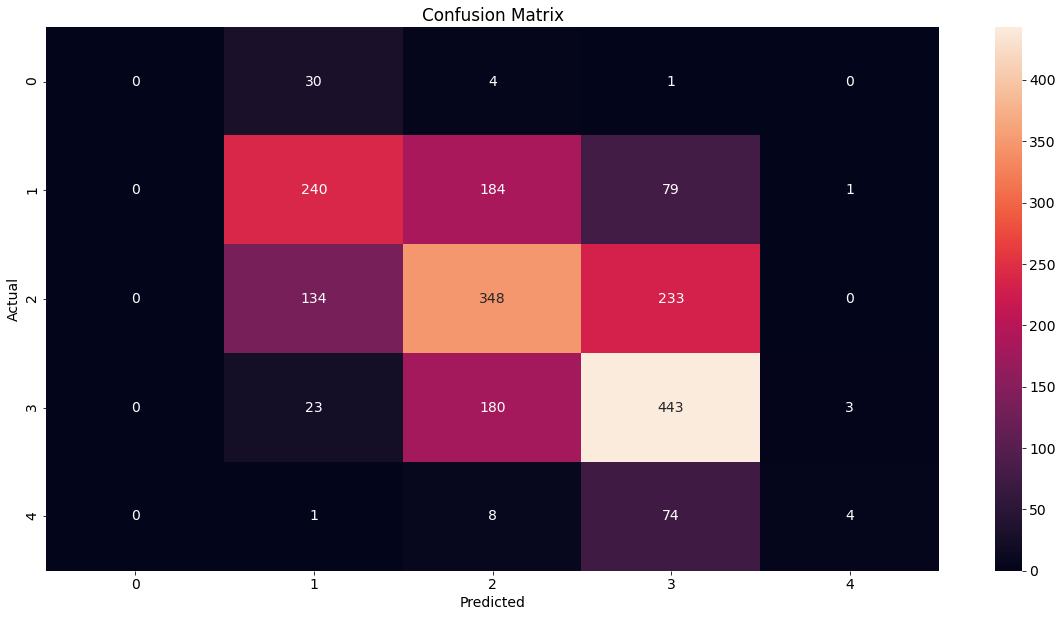

Classification Accuracy: 0.5201005025125628
Classification Error: 0.4798994974874372


In [13]:
# make class predictions for the testing set

y_pred_class = my_forest.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
# [row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# visualize Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('Classification Accuracy:', accuracy)
print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

In [14]:
print('------Weighted------')
print('Weighted precision', precision_score(y_test, y_pred_class, average='weighted'))
print('Weighted recall', recall_score(y_test, y_pred_class, average='weighted'))
print('Weighted f1-score', f1_score(y_test, y_pred_class, average='weighted'))

------Weighted------
Weighted precision 0.5106456439611519
Weighted recall 0.5201005025125628
Weighted f1-score 0.503269490333847


In [15]:
# Higher value = better classifier
y_pred_prob = forest.predict_proba(X_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob,multi_class="ovr")
roc_auc

0.7967321316147876